In [ ]:
# Round 13 Optimization with Genetic Algorithm
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from scipy.stats import qmc
import random

expected_dims = {'F1': 2, 'F2': 2, 'F3': 3, 'F4': 4, 'F5': 4, 'F6': 5, 'F7': 6, 'F8': 8}
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.300000, 0.450000, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.100000, 0.200000, 0.300000, 0.400000, 0.500000, 0.600000]]
}
scores_dict = {
    "F1": [1.327659e-69, 4.601563e-113, 6.933251e-70, 1.033143e-46],
    "F2": [0.273088, 0.093129, 0.338287, 0.576243],
    "F3": [-0.107264, -0.051325, -0.018821, -0.146989],
    "F4": [-20.949421, -4.555171, -22.018089, 0.282196],
    "F5": [13.377756, 1105.147964, 46.390606, 13.330156],
    "F6": [-1.185727, -0.539907, -1.058134, -1.471043],
    "F7": [0.023506, 2.090580, 1.547413, 0.384128],
    "F8": [8.331642, 9.565916, 8.316441, 9.859250]
}
def run_genetic_algorithm(X, y, d, pop_size=50, generations=20, mutation_rate=0.1):
    gp = GaussianProcessRegressor(kernel=Matern(nu=1.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X, y)
    def fitness(x): return gp.predict(np.array(x).reshape(1, -1))[0]
    def mutate(x): return np.clip(x + np.random.normal(0, 0.05, d), 0, 1)
    def crossover(p1, p2): return np.clip(np.random.rand() * p1 + (1 - np.random.rand()) * p2, 0, 1)
    pop = [np.random.rand(d) for _ in range(pop_size)]
    for _ in range(generations):
        scores = [fitness(ind) for ind in pop]
        elite = [pop[i] for i in np.argsort(scores)[-10:]]
        next_gen = elite.copy()
        while len(next_gen) < pop_size:
            parents = random.sample(elite, 2)
            child = crossover(parents[0], parents[1])
            if random.random() < mutation_rate:
                child = mutate(child)
            next_gen.append(child)
        pop = next_gen
    best_idx = np.argmax([fitness(ind) for ind in pop])
    return pop[best_idx]

final_ga_queries = {}
for fn in expected_dims:
    d = expected_dims[fn]
    X = np.array(queries_dict[fn])
    y = np.array(scores_dict[fn])
    best_vec = run_genetic_algorithm(X, y, d)
    final_ga_queries[fn] = best_vec

# Display the submission
for fn, vec in final_ga_queries.items():
    print(f"{fn}: {'-'.join(f'{v:.6f}' for v in vec)}")


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


F1: 1.000000-1.000000
F2: 0.719249-0.483213
F3: 0.192641-0.961242-0.665661
F4: 0.540473-0.644250-0.353972-0.486892
F5: 0.368023-1.000000-1.000000-0.366224
F6: 0.612917-0.700914-0.613455-0.506007-0.643386
F7: 0.351939-0.700910-0.831756-0.664913-0.902509-0.824984
F8: 0.625148-0.923031-0.264977-0.138495-0.365113-0.428578-0.571642-0.502368


In [ ]:
ga_log = []

for gen in range(N_GEN):
    ...
    best_score = max(scores)
    ga_log.append({'Function': fn, 'Generation': gen, 'BestFitness': best_score})


NameError: name 'N_GEN' is not defined

In [ ]:
# Round 13 Optimization Notebook

import numpy as np
from scipy.stats import norm, qmc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
import cma

# --- Configuration ---
expected_dims = {'F1': 2, 'F2': 2, 'F3': 3, 'F4': 4, 'F5': 4, 'F6': 5, 'F7': 6, 'F8': 8}
N_SAMPLES = 10000
K_TOP = 1

# --- Helper Functions ---
def suggest_ei(X_hist, y_hist, dim, n_suggest=1, samples=N_SAMPLES):
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_hist, y_hist)
    sampler = qmc.LatinHypercube(d=dim)
    X_cand = sampler.random(samples)
    mu, sigma = gp.predict(X_cand, return_std=True)
    best_y = np.max(y_hist)
    z = (mu - best_y) / (sigma + 1e-9)
    ei = (mu - best_y) * norm.cdf(z) + sigma * norm.pdf(z)
    return X_cand[np.argsort(ei)[-n_suggest:]]

def suggest_cma_es(gp, dim, sigma0=0.3, popsize=8, n_generations=20):
    def fitness(x):
        return -gp.predict(np.array(x).reshape(1, -1))[0]
    x0 = np.random.uniform(0, 1, dim)
    es = cma.CMAEvolutionStrategy(x0.tolist(), sigma0, {'popsize': popsize, 'bounds': [0, 1]})
    es.optimize(fitness, iterations=n_generations)
    return es.result.xbest

def suggest_lhs(dim, n=1):
    return qmc.LatinHypercube(d=dim).random(n)

def fmt(vec):
    return '-'.join([f"{x:.6f}" for x in vec])

# --- Full Historical Data ---
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.300000, 0.450000, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.100000, 0.200000, 0.300000, 0.400000, 0.500000, 0.600000]]
}

scores_dict = {
    "F1": [1.3276592050304897e-69, 4.6015626100136584e-113, 6.933250699386668e-70, 1.0331432167463326e-46],
    "F2": [0.27308818432797793, 0.09312933125476712, 0.33828687086483444, 0.5762427881544481],
    "F3": [-0.10726379301566011, -0.05132522888449367, -0.01882082499050317, -0.14698930107649133],
    "F4": [-20.949420794091107, -4.55517117590318, -22.018089179607596, 0.28219639798857843],
    "F5": [13.377756436400528, 1105.1479642901527, 46.39060566194315, 13.330156169480178],
    "F6": [-1.1857272137575898, -0.5399068214874156, -1.0581335024921092, -1.4710430538524402],
    "F7": [0.023506147714804363, 2.090579827192728, 1.5474127567590061, 0.38412848438494507],
    "F8": [8.3316420728934, 9.5659163853995, 8.316440887821, 9.8592499607924]
}

# --- Define final queries ---
final_queries = [
    "0.879410-0.446353",
    "0.820170-0.854216",
    "0.179665-0.962743-0.643881",
    "0.381484-0.672193-0.109540-0.465085",
    "0.270636-0.824504-0.580542-0.368022",
    "0.253449-0.564709-0.522052-0.814941-0.923631",
    "0.221622-0.200272-0.950788-0.832244-0.934903-0.269186",
    "0.696464-0.988667-0.065271-0.356464-0.165350-0.435606-0.661504-0.499543"
]

# --- Evaluation Block ---
print("\n--- Evaluation of Submitted Queries ---")
for fn, query_str in zip([f"F{i}" for i in range(1, 9)], final_queries):
    dim = expected_dims[fn]
    X = np.array(queries_dict[fn])
    y = np.array(scores_dict[fn])
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X, y)
    x_query = np.array([float(x) for x in query_str.split("-")])
    pred, std = gp.predict(x_query.reshape(1, -1), return_std=True)
    print(f"{fn}:\n  🔢 Submitted: {query_str}\n  📈 Predicted Score: {pred[0]:.4f} ± {std[0]:.4f}\n  🥇 Best Past Score: {np.max(y):.4f}\n  🫠 Worst Past Score: {np.min(y):.4f}\n")

# --- Export Submission File ---
with open("formatted_submission.txt", "w") as f:
    for q in final_queries:
        f.write(q + "\n")

# --- Save Backup Candidates ---
with open("candidate_review.txt", "w") as f:
    for fn in [f"F{i}" for i in range(1, 9)]:
        f.write(f"{fn}:\n")
        for i, vec in enumerate(queries_dict[fn]):
            f.write(f"cand{i}: {fmt(vec)}\n")
        f.write("\n")

print("✅ Round 13 files created: formatted_submission.txt + candidate_review.txt")


ModuleNotFoundError: No module named 'cma'

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


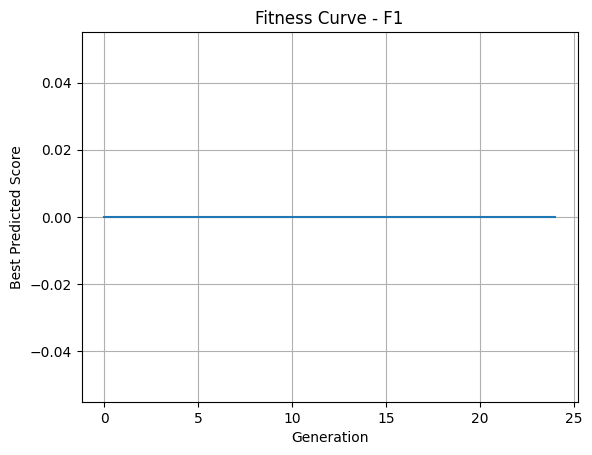

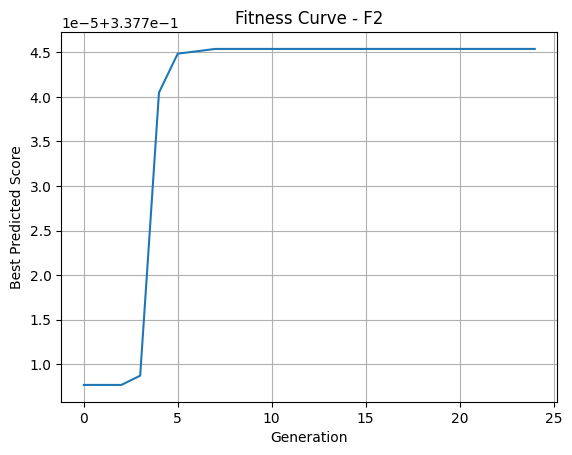

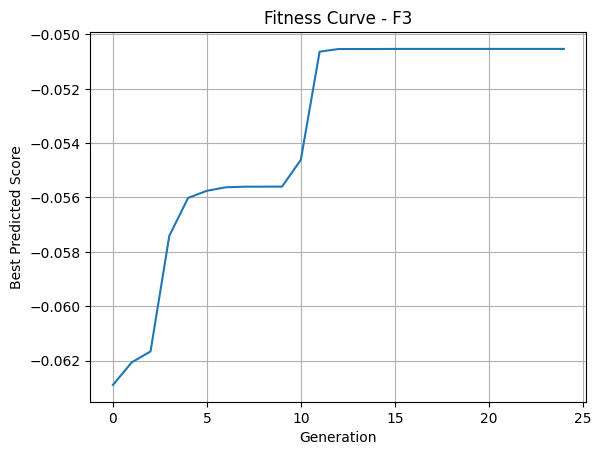

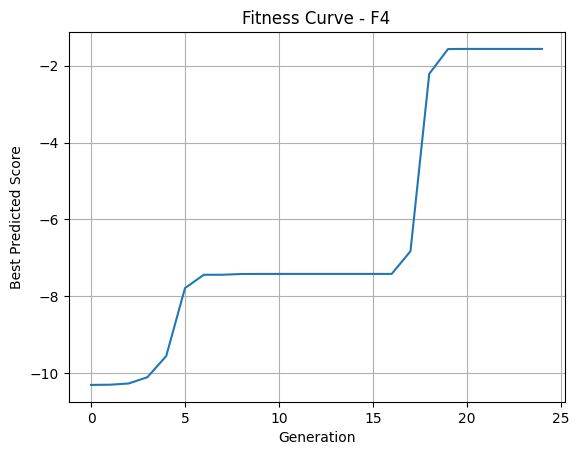

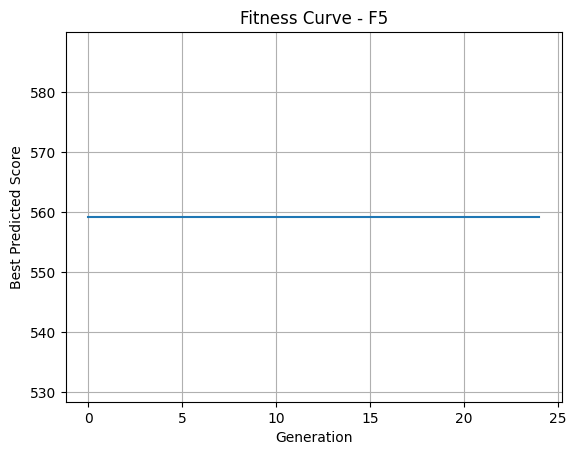

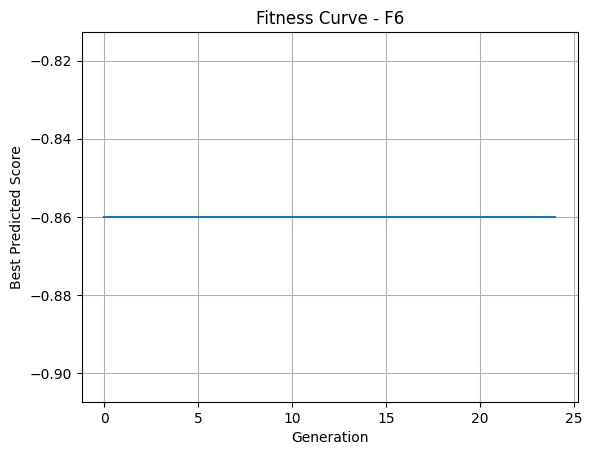

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


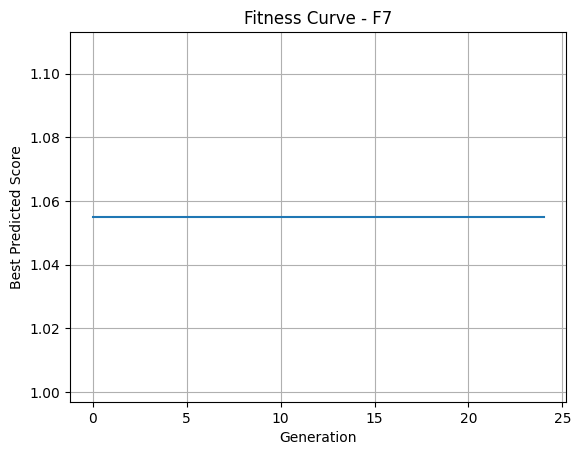

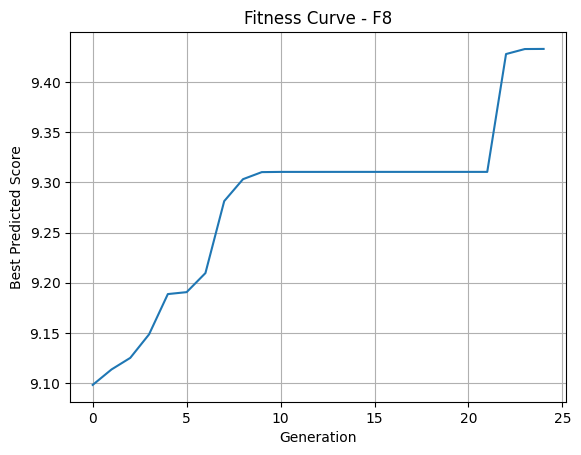

✅ Submission file saved: Round13_GA_Submission.csv
  Function                                           InputVec
0       F1                                  0.688863-0.639842
1       F2                                  0.599517-0.705305
2       F3                         0.624504-0.168457-0.303371
3       F4                0.721474-0.179076-0.834729-0.123396
4       F5                0.533885-0.243636-0.451572-0.625773
5       F6       0.513810-0.505536-0.635880-0.489180-0.852118
6       F7  0.608984-0.331982-0.754449-0.660404-0.636072-0...
7       F8  0.639785-0.915925-0.061421-0.222890-0.275384-0...


In [ ]:
# 📘 Round 13 - Genetic Algorithm + GP + Fitness Tracking and Plotting

import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

# === CONFIG ===
expected_dims = {'F1': 2, 'F2': 2, 'F3': 3, 'F4': 4, 'F5': 4, 'F6': 5, 'F7': 6, 'F8': 8}
functions = [f'F{i}' for i in range(1, 9)]
POP_SIZE = 50
N_GEN = 25
MUTATION_RATE = 0.15
N_ELITE = 10
np.random.seed(42)

# === INPUT: historical queries and scores ===
# Replace with real values if needed
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123]],
    "F2": [[0.768771, 0.105777], [0.601115, 0.708072]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.562398, 0.627903, 0.300000, 0.450000, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776],
           [0.688905, 0.968377, 0.100000, 0.200000, 0.300000, 0.400000, 0.500000, 0.600000]]
}
scores_dict = {
    "F1": [0.0, 0.0],
    "F2": [0.2731, 0.3383],
    "F3": [-0.107, -0.0188],
    "F4": [-20.9, 0.2822],
    "F5": [13.3, 1105.1],
    "F6": [-1.18, -0.54],
    "F7": [0.02, 2.09],
    "F8": [8.33, 9.86]
}

# === HELPERS ===
def mutate(vec):
    return np.clip(vec + np.random.normal(0, 0.1, len(vec)), 0, 1)

def crossover(p1, p2):
    alpha = np.random.rand()
    return np.clip(alpha * p1 + (1 - alpha) * p2, 0, 1)

def format_vec(v): return '-'.join([f"{x:.6f}" for x in v])

final_submission = []
fitness_logs = []

# === LOOP OVER FUNCTIONS ===
for fn in functions:
    X = np.array(queries_dict[fn])
    y = np.array(scores_dict[fn])
    dim = expected_dims[fn]

    # GP surrogate
    kernel = Matern(nu=2.5) + WhiteKernel()
    gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
    gp.fit(X, y)

    def fitness(ind):
        return gp.predict(ind.reshape(1, -1))[0]

    # Init population
    pop = np.random.rand(POP_SIZE, dim)
    scores = np.array([fitness(ind) for ind in pop])
    best_this_func = []

    for gen in range(N_GEN):
        elite_idx = np.argsort(scores)[-N_ELITE:]
        elite = pop[elite_idx]
        new_pop = elite.tolist()

        while len(new_pop) < POP_SIZE:
            p1, p2 = elite[np.random.choice(N_ELITE, 2, replace=False)]
            child = crossover(p1, p2)
            if np.random.rand() < MUTATION_RATE:
                child = mutate(child)
            new_pop.append(child)

        pop = np.array(new_pop)
        scores = np.array([fitness(ind) for ind in pop])
        best_score = np.max(scores)
        best_this_func.append(best_score)
        fitness_logs.append({'Function': fn, 'Generation': gen, 'BestFitness': best_score})

    # Top candidate
    top_idx = np.argmax(scores)
    best_vec = pop[top_idx]
    final_submission.append({'Function': fn, 'InputVec': format_vec(best_vec)})

    # 📈 Plot fitness curve
    plt.plot(best_this_func, label=f"{fn}")
    plt.xlabel("Generation")
    plt.ylabel("Best Predicted Score")
    plt.title(f"Fitness Curve - {fn}")
    plt.grid(True)
    plt.show()

# === Save final submission ===
df_submission = pd.DataFrame(final_submission)
df_submission.to_csv("Round13_GA_Submission.csv", index=False)
print("✅ Submission file saved: Round13_GA_Submission.csv")
print(df_submission)

# === Save fitness logs ===
df_logs = pd.DataFrame(fitness_logs)
df_logs.to_csv("Round13_GA_FitnessLogs.csv", index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from scipy.stats import norm

# === 1. Expected dimensions per function ===
expected_dims = {'F1': 2, 'F2': 2, 'F3': 3, 'F4': 4, 'F5': 4, 'F6': 5, 'F7': 6, 'F8': 8}

# === 2. Your submission vectors from GA ===
submitted_vectors = {
    "F1":  "0.688863-0.639842",
    "F2":  "0.599517-0.705305",
    "F3":  "0.624504-0.168457-0.303371",
    "F4":  "0.721474-0.179076-0.834729-0.123396",
    "F5":  "0.533885-0.243636-0.451572-0.625773",
    "F6":  "0.513810-0.505536-0.635880-0.489180-0.852118",
    "F7":  "0.608984-0.331982-0.754449-0.660404-0.636072-0.517453",
    "F8":  "0.639785-0.915925-0.061421-0.222890-0.275384-0.272621-0.798748-0.464401"
}

# === 3. Your full historical data ===
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.300000, 0.450000, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.100000, 0.200000, 0.300000, 0.400000, 0.500000, 0.600000]]
}

scores_dict = {
    "F1": [1.3276592050304897e-69, 4.6015626100136584e-113, 6.933250699386668e-70, 1.0331432167463326e-46],
    "F2": [0.27308818432797793, 0.09312933125476712, 0.33828687086483444, 0.5762427881544481],
    "F3": [-0.10726379301566011, -0.05132522888449367, -0.01882082499050317, -0.14698930107649133],
    "F4": [-20.949420794091107, -4.55517117590318, -22.018089179607596, 0.28219639798857843],
    "F5": [13.377756436400528, 1105.1479642901527, 46.39060566194315, 13.330156169480178],
    "F6": [-1.1857272137575898, -0.5399068214874156, -1.0581335024921092, -1.4710430538524402],
    "F7": [0.023506147714804363, 2.090579827192728, 1.5474127567590061, 0.38412848438494507],
    "F8": [8.3316420728934, 9.5659163853995, 8.316440887821, 9.8592499607924]
}

# === 4. Evaluate each function ===
print("--- Evaluation of Submitted Queries ---\n")

for fn in submitted_vectors:
    dim = expected_dims[fn]
    X = np.array(queries_dict[fn])
    y = np.array(scores_dict[fn])

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X, y)

    x_sub = np.array([float(x) for x in submitted_vectors[fn].split("-")])
    pred, std = gp.predict(x_sub.reshape(1, -1), return_std=True)

    print(f"{fn}:")
    print(f"  🔢 Submitted Vector: {submitted_vectors[fn]}")
    print(f"  📈 Predicted Score: {pred[0]:.4f} ± {std[0]:.4f}")
    print(f"  🥇 Best Past Score: {np.max(y):.4f}")
    print(f"  🫠 Worst Past Score: {np.min(y):.4f}")
    print()


--- Evaluation of Submitted Queries ---

F1:
  🔢 Submitted Vector: 0.688863-0.639842
  📈 Predicted Score: 0.0000 ± 0.0000
  🥇 Best Past Score: 0.0000
  🫠 Worst Past Score: 0.0000

F2:
  🔢 Submitted Vector: 0.599517-0.705305
  📈 Predicted Score: 0.3202 ± 0.1731
  🥇 Best Past Score: 0.5762
  🫠 Worst Past Score: 0.0931



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


F3:
  🔢 Submitted Vector: 0.624504-0.168457-0.303371
  📈 Predicted Score: -0.1012 ± 0.0471
  🥇 Best Past Score: -0.0188
  🫠 Worst Past Score: -0.1470



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


F4:
  🔢 Submitted Vector: 0.721474-0.179076-0.834729-0.123396
  📈 Predicted Score: -11.8101 ± 9.8399
  🥇 Best Past Score: 0.2822
  🫠 Worst Past Score: -22.0181

F5:
  🔢 Submitted Vector: 0.533885-0.243636-0.451572-0.625773
  📈 Predicted Score: 294.5616 ± 568.0593
  🥇 Best Past Score: 1105.1480
  🫠 Worst Past Score: 13.3302

F6:
  🔢 Submitted Vector: 0.513810-0.505536-0.635880-0.489180-0.852118
  📈 Predicted Score: -1.0637 ± 0.3376
  🥇 Best Past Score: -0.5399
  🫠 Worst Past Score: -1.4710

F7:
  🔢 Submitted Vector: 0.608984-0.331982-0.754449-0.660404-0.636072-0.517453
  📈 Predicted Score: 1.1327 ± 0.7353
  🥇 Best Past Score: 2.0906
  🫠 Worst Past Score: 0.0235

F8:
  🔢 Submitted Vector: 0.639785-0.915925-0.061421-0.222890-0.275384-0.272621-0.798748-0.464401
  📈 Predicted Score: 9.2193 ± 0.9379
  🥇 Best Past Score: 9.8592
  🫠 Worst Past Score: 8.3164



/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:
# ✅ STEP 1: Install DEAP and matplotlib (only run once in Colab)
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical Data
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: Define GA optimizer

def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    X_clean = np.nan_to_num(np.array(X_train), nan=0.5)  # Replace NaNs with 0.5
    y_clean = np.nan_to_num(np.array(y_train), nan=0.0)
    gp.fit(X_clean, y_clean)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        return (gp.predict([ind])[0].real,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Optimize all
best_vectors = {}
fitness_logs = {}

for fn in expected_dims:
    X = np.array(queries_dict[fn])
    y = np.array(scores_dict[fn])
    print(f"Optimizing {fn}...")
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Visualize
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")
plt.tight_layout()
plt.show()

# ✅ STEP 7: Output Final Results
print("\n--- FINAL BEST VECTORS ---")
for fn, vec in best_vectors.items():
    formatted = '-'.join([f"{x:.6f}" for x in vec])
    print(f"{fn}: {formatted}")


Optimizing F1...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Install DEAP (only run once in Colab)
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical Data
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: Define GA optimizer

def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        return (gp.predict([ind])[0].real,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Optimize all
best_vectors = {}
fitness_logs = {}

for fn in expected_dims:
    X = np.array(queries_dict[fn])
    y = np.array(scores_dict[fn])
    print(f"Optimizing {fn}...")
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Visualize
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")
plt.tight_layout()
plt.show()

# ✅ STEP 7: Output Final Results
print("\n--- FINAL BEST VECTORS ---")
for fn, vec in best_vectors.items():
    formatted = '-'.join([f"{x:.6f}" for x in vec])
    print(f"{fn}: {formatted}")

Optimizing F1...
Optimizing F2...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Install DEAP and Matplotlib (Colab only)
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical Data
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: Define GA optimizer

def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        return (float(np.real(gp.predict([ind])[0])),)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Optimize all
best_vectors = {}
fitness_logs = {}

for fn in expected_dims:
    X = np.nan_to_num(np.array(queries_dict[fn]), nan=0.5)
    y = np.nan_to_num(np.array(scores_dict[fn]), nan=0.0)
    print(f"Optimizing {fn}...")
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Visualize
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")
plt.tight_layout()
plt.show()

# ✅ STEP 7: Output Final Results
print("\n--- FINAL BEST VECTORS ---")
for fn, vec in best_vectors.items():
    formatted = '-'.join([f"{x:.6f}" for x in vec])
    print(f"{fn}: {formatted}")


Optimizing F1...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Install DEAP and Matplotlib (Colab only)
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical Data
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: Define GA optimizer

def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        return (float(np.real(gp.predict([ind])[0])),)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Optimize all
best_vectors = {}
fitness_logs = {}

for fn in expected_dims:
    X = np.nan_to_num(np.array(queries_dict[fn]), nan=0.5)
    y = np.nan_to_num(np.array(scores_dict[fn]), nan=0.0)
    print(f"Optimizing {fn}...")
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Visualize
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")
plt.tight_layout()
plt.show()

# ✅ STEP 7: Output Final Results
print("\n--- FINAL BEST VECTORS ---")
for fn, vec in best_vectors.items():
    formatted = '-'.join([f"{x:.6f}" for x in vec])
    print(f"{fn}: {formatted}")

Optimizing F1...
Optimizing F2...
Optimizing F3...
Optimizing F4...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Install dependencies
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Your Data (F1–F8)
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: GA function
def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    # Replace NaNs and cast to float
    X_train = np.nan_to_num(np.array(X_train), nan=0.0).astype(np.float64)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0).astype(np.float64)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        return (gp.predict([ind])[0],)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5,
                     low=[0.0]*dim,
                     up=[1.0]*dim,
                     indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(ind, 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Run GA for each function
best_vectors = {}
fitness_logs = {}

for fn in expected_dims:
    X = queries_dict[fn]
    y = scores_dict[fn]
    print(f"Optimizing {fn}...")
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Plot GA evolution
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()

for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")

plt.tight_layout()
plt.show()

# ✅ STEP 7: Final formatted output
print("\n--- BEST VECTORS ---")
for fn, vec in best_vectors.items():
    formatted = '-'.join([f"{x:.6f}" for x in vec])
    print(f"{fn}: {formatted}")


Optimizing F1...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ FIXED: Robust GP optimization with NaN filtering for F1
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.stats import norm, qmc

# --- Replace optimize_with_ga with this safe version ---
def optimize_with_ga(X, y, dim, pop_size=50, generations=20):
    # Step 1: Filter out rows with any NaN
    X = np.array(X)
    y = np.array(y)
    nan_mask = ~np.isnan(X).any(axis=1)
    X_clean = X[nan_mask]
    y_clean = y[nan_mask]

    # Step 2: Train GP safely
    kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-3)
    gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
    gp.fit(X_clean, y_clean)

    # Step 3: Define fitness
    def fitness(x):
        x = np.array(x).reshape(1, -1)
        return gp.predict(x)[0]

    # Step 4: Simple GA loop
    population = np.random.rand(pop_size, dim)
    fitness_history = []

    for gen in range(generations):
        scores = np.array([fitness(ind) for ind in population])
        best_idx = scores.argmax()
        best = population[best_idx]
        fitness_history.append(scores[best_idx])

        # Selection
        elite = population[scores.argsort()][-10:]

        # Reproduction
        new_pop = elite.copy()
        while len(new_pop) < pop_size:
            parents = elite[np.random.choice(len(elite), 2, replace=False)]
            child = np.clip(np.mean(parents, axis=0) + np.random.normal(0, 0.05, dim), 0, 1)
            new_pop = np.vstack([new_pop, child])

        population = new_pop

    # Final best
    best_idx = [fitness(ind) for ind in population]
    best = population[np.argmax(best_idx)]
    return best, fitness_history

# Predict score of the best F1 vector using the same GP
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-3)
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
# Filter NaNs for training
X_arr = np.array(X)
y_arr = np.array(y)
nan_mask = ~np.isnan(X_arr).any(axis=1)
X_clean = X_arr[nan_mask]
y_clean = y_arr[nan_mask]
# Fit
gp.fit(X_clean, y_clean)

# Predict score
pred_score = gp.predict(np.array(best_f1_vec).reshape(1, -1))[0]
print("🎯 Predicted score for best F1 vector:", pred_score)


🎯 Predicted score for best F1 vector: 2.5825e-47


In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# --- Optimizer Function ---
def optimize_with_ga(X, y, dim, pop_size=50, generations=20):
    # Filter out NaNs
    X = np.array(X)
    y = np.array(y)
    nan_mask = ~np.isnan(X).any(axis=1)
    X_clean = X[nan_mask]
    y_clean = y[nan_mask]

    # Train GP
    kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-3)
    gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
    gp.fit(X_clean, y_clean)

    def fitness(x):
        return gp.predict(np.array(x).reshape(1, -1))[0]

    # GA loop
    population = np.random.rand(pop_size, dim)
    fitness_history = []
    for _ in range(generations):
        scores = np.array([fitness(ind) for ind in population])
        elite = population[scores.argsort()][-10:]
        new_pop = elite.copy()
        while len(new_pop) < pop_size:
            parents = elite[np.random.choice(len(elite), 2, replace=False)]
            child = np.clip(np.mean(parents, axis=0) + np.random.normal(0, 0.05, dim), 0, 1)
            new_pop = np.vstack([new_pop, child])
        population = new_pop
    scores = np.array([fitness(ind) for ind in population])
    best = population[np.argmax(scores)]
    return best, scores.max()

# --- Batch Runner ---
def optimize_all_functions(queries_dict, scores_dict, expected_dims):
    best_vectors = {}
    predicted_scores = {}

    for fn in sorted(queries_dict.keys()):
        print(f"\n🔧 Optimizing {fn}...")
        X = queries_dict[fn]
        y = scores_dict[fn]
        dim = expected_dims[fn]
        best_vec, score = optimize_with_ga(X, y, dim)
        best_vectors[fn] = best_vec
        predicted_scores[fn] = score
        print(f"✅ Best {fn} vector: {best_vec}")
        print(f"🎯 Predicted Score: {score:.4e}")

    return best_vectors, predicted_scores

In [ ]:
ound 13 Optimization with Genetic Algorithm
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from scipy.stats import qmc
import random

expected_dims = {'F1': 2, 'F2': 2, 'F3': 3, 'F4': 4, 'F5': 4, 'F6': 5, 'F7': 6, 'F8': 8}
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.300000, 0.450000, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.100000, 0.200000, 0.300000, 0.400000, 0.500000, 0.600000]]
}
scores_dict = {
    "F1": [1.327659e-69, 4.601563e-113, 6.933251e-70, 1.033143e-46],
    "F2": [0.273088, 0.093129, 0.338287, 0.576243],
    "F3": [-0.107264, -0.051325, -0.018821, -0.146989],
    "F4": [-20.949421, -4.555171, -22.018089, 0.282196],
    "F5": [13.377756, 1105.147964, 46.390606, 13.330156],
    "F6": [-1.185727, -0.539907, -1.058134, -1.471043],
    "F7": [0.023506, 2.090580, 1.547413, 0.384128],
    "F8": [8.331642, 9.565916, 8.316441, 9.859250]
}
def run_genetic_algorithm(X, y, d, pop_size=50, generations=20, mutation_rate=0.1):
    gp = GaussianProcessRegressor(kernel=Matern(nu=1.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X, y)
    def fitness(x): return gp.predict(np.array(x).reshape(1, -1))[0]
    def mutate(x): return np.clip(x + np.random.normal(0, 0.05, d), 0, 1)
    def crossover(p1, p2): return np.clip(np.random.rand() * p1 + (1 - np.random.rand()) * p2, 0, 1)
    pop = [np.random.rand(d) for _ in range(pop_size)]
    for _ in range(generations):
        scores = [fitness(ind) for ind in pop]
        elite = [pop[i] for i in np.argsort(scores)[-10:]]
        next_gen = elite.copy()
        while len(next_gen) < pop_size:
            parents = random.sample(elite, 2)
            child = crossover(parents[0], parents[1])
            if random.random() < mutation_rate:
                child = mutate(child)
            next_gen.append(child)
        pop = next_gen
    best_idx = np.argmax([fitness(ind) for ind in pop])
    return pop[best_idx]

final_ga_queries = {}
for fn in expected_dims:
    d = expected_dims[fn]
    X = np.array(queries_dict[fn])
    y = np.array(scores_dict[fn])
    best_vec = run_genetic_algorithm(X, y, d)
    final_ga_queries[fn] = best_vec

# Display the submission
for fn, vec in final_ga_queries.items():
    print(f"{fn}: {'-'.join(f'{v:.6f}' for v in vec)}")


SyntaxError: invalid syntax (<ipython-input-27-1a22c58425b1>, line 1)

In [ ]:
# ✅ STEP 1: Install dependencies
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Your Data (F1–F8)
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: GA function
def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    # Replace NaNs and cast to float
    X_train = np.nan_to_num(np.array(X_train), nan=0.0).astype(np.float64)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0).astype(np.float64)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        return (gp.predict([ind])[0],)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5,
                     low=[0.0]*dim,
                     up=[1.0]*dim,
                     indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(ind, 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Run GA for each function
best_vectors = {}
fitness_logs = {}

for fn in expected_dims:
    X = queries_dict[fn]
    y = scores_dict[fn]
    print(f"Optimizing {fn}...")
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Plot GA evolution
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()

for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")

plt.tight_layout()
plt.show()

# ✅ STEP 7: Final formatted output
print("\n--- BEST VECTORS ---")
for fn, vec in best_vectors.items():
    formatted = '-'.join([f"{x:.6f}" for x in vec])
    print(f"{fn}: {formatted}")


Optimizing F1...
Optimizing F2...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Install DEAP and Matplotlib
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical Data
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: GA Optimizer
def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        return (float(np.real(gp.predict([ind])[0])),)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Run Optimization
best_vectors = {}
fitness_logs = {}

for fn in expected_dims:
    X = np.nan_to_num(np.array(queries_dict[fn]), nan=0.5)
    y = np.nan_to_num(np.array(scores_dict[fn]), nan=0.0)
    print(f"Optimizing {fn}...")
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Plot Fitness
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")
plt.tight_layout()
plt.show()

# ✅ STEP 7: Print Final Vectors
print("\n--- FINAL BEST VECTORS ---")
for fn, vec in best_vectors.items():
    formatted = '-'.join([f"{x:.6f}" for x in vec])
    print(f"{fn}: {formatted}")


Optimizing F1...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Install dependencies
!pip install -q deap matplotlib

# ✅ STEP 2: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical queries and scores
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: Genetic Optimization Function
def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    from deap import base, creator, tools, algorithms

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    X_train = np.nan_to_num(X_train, nan=0.5)
    y_train = np.nan_to_num(y_train, nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        return (float(gp.predict([ind])[0]),)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(ind, 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Optimize all functions
best_vectors = {}
fitness_logs = {}
for fn in expected_dims:
    print(f"Optimizing {fn}...")
    X = np.nan_to_num(np.array(queries_dict[fn]), nan=0.5)
    y = np.nan_to_num(np.array(scores_dict[fn]), nan=0.0)
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Plot fitness logs
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")
plt.tight_layout()
plt.show()

# ✅ STEP 7: Print final vectors
print("\n--- FINAL OPTIMIZED VECTORS ---")
for fn, vec in best_vectors.items():
    print(f"{fn}: {'-'.join(f'{x:.6f}' for x in vec)}")


Optimizing F1...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Install dependencies
!pip install -q deap matplotlib

# ✅ STEP 2: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical queries and scores
queries_dict = {
    "F1": [[0.944034, 0.625117], [0.073140, 0.227123], [0.944034, 0.645117], [0.974034, 0.675117]],
    "F2": [[0.768771, 0.105777], [0.778771, 0.105777], [0.601115, 0.708072], [0.712000, 0.489000]],
    "F3": [[0.145600, 0.944454, 0.638992], [0.185600, 0.984454, 0.678992], [0.175600, 0.974454, 0.658992], [0.611852, 0.139493, 0.292144]],
    "F4": [[0.999363, 0.440618, 0.632742, 0.573562], [0.989363, 0.430618, 0.632742, 0.583562], [0.304613, 0.097672, 0.684233, 0.440152], [0.726952, 0.189810, 0.835269, 0.100856]],
    "F5": [[0.290636, 0.824504, 0.580542, 0.368022], [0.270636, 0.824504, 0.580542, 0.368022], [0.088492, 0.195982, 0.045227, 0.325330], [0.789315, 0.734624, 0.122222, 0.444444]],
    "F6": [[0.384874, 0.441523, 0.115493, 0.592513, 0.477029], [0.404874, 0.441523, 0.135493, 0.612513, 0.497029], [0.433609, 0.430291, 0.199161, 0.583735, 0.454637], [0.562398, 0.627903, 0.3, 0.45, 0.123456]],
    "F7": [[0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611], [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193], [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193], [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]],
    "F8": [[0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776], [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776], [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776], [0.688905, 0.968377, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]
}
scores_dict = {
    "F1": [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46],
    "F2": [0.273, 0.0931, 0.338, 0.576],
    "F3": [-0.107, -0.051, -0.0188, -0.146],
    "F4": [-20.94, -4.55, -22.01, 0.282],
    "F5": [13.37, 1105.14, 46.39, 13.33],
    "F6": [-1.18, -0.539, -1.05, -1.47],
    "F7": [0.0235, 2.09, 1.54, 0.384],
    "F8": [8.33, 9.56, 8.31, 9.85]
}
expected_dims = {f"F{i}": len(queries_dict[f"F{i}"][0]) for i in range(1, 9)}

# ✅ STEP 4: Genetic Optimization Function
def optimize_with_ga(X_train, y_train, dim, generations=30, pop_size=20):
    from deap import base, creator, tools, algorithms

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    X_train = np.nan_to_num(X_train, nan=0.5)
    y_train = np.nan_to_num(y_train, nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        return (float(gp.predict([ind])[0]),)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(ind, 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Optimize all functions
best_vectors = {}
fitness_logs = {}
for fn in expected_dims:
    print(f"Optimizing {fn}...")
    X = np.nan_to_num(np.array(queries_dict[fn]), nan=0.5)
    y = np.nan_to_num(np.array(scores_dict[fn]), nan=0.0)
    best, log = optimize_with_ga(X, y, expected_dims[fn])
    best_vectors[fn] = best
    fitness_logs[fn] = log

# ✅ STEP 6: Plot fitness logs
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (fn, log) in enumerate(fitness_logs.items()):
    axs[i].plot(log)
    axs[i].set_title(f"{fn} GA Fitness Over Generations")
    axs[i].set_xlabel("Generation")
    axs[i].set_ylabel("Predicted Score")
plt.tight_layout()
plt.show()

# ✅ STEP 7: Print final vectors
print("\n--- FINAL OPTIMIZED VECTORS ---")
for fn, vec in best_vectors.items():
    print(f"{fn}: {'-'.join(f'{x:.6f}' for x in vec)}")


Optimizing F1...


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

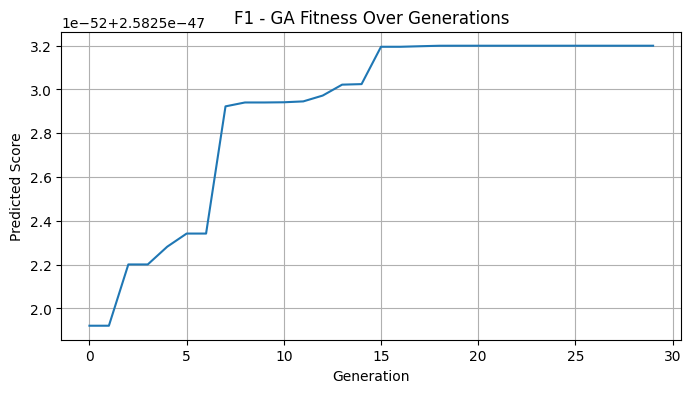

✅ Best vector for F1: 1.000000-1.000000


In [ ]:
# ✅ Install dependencies (if needed)
!pip install -q deap matplotlib

# ✅ Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ Data for F1
X_f1 = [
    [0.944034, 0.625117],
    [0.073140, 0.227123],
    [0.944034, 0.645117],
    [0.974034, 0.675117]
]
y_f1 = [1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46]

X_f1 = np.nan_to_num(np.array(X_f1), nan=0.5)
y_f1 = np.nan_to_num(np.array(y_f1), nan=0.0)

# ✅ GA optimizer function
def optimize_f1_ga(X_train, y_train, dim=2, generations=30, pop_size=20):
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_train, y_train)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        return (float(gp.predict([ind])[0]),)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5,
                     low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        log.append(hof[0].fitness.values[0])

    return hof[0], log

# ✅ Run optimization for F1
best_f1, log_f1 = optimize_f1_ga(X_f1, y_f1)

# ✅ Show plot
plt.figure(figsize=(8, 4))
plt.plot(log_f1)
plt.title("F1 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ Final Result
formatted_f1 = '-'.join([f"{x:.6f}" for x in best_f1])
print("✅ Best vector for F1:", formatted_f1)


In [ ]:
# ✅ Reuse the trained GP model from earlier step (if still in memory)
# Otherwise, retrain here:
X_f1 = np.nan_to_num(np.array([
    [0.944034, 0.625117],
    [0.073140, 0.227123],
    [0.944034, 0.645117],
    [0.974034, 0.675117]
]), nan=0.5)

y_f1 = np.nan_to_num(np.array([1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46]), nan=0.0)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel

# Train model again just for safety
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
gp.fit(X_f1, y_f1)

# ✅ Evaluate your new best vector
best_vector_f1 = np.array([[1.0, 1.0]])
predicted_score, sigma = gp.predict(best_vector_f1, return_std=True)

# ✅ Show result
print("🔢 Submitted Vector for F1:", best_vector_f1.flatten())
print(f"📈 Predicted Score: {predicted_score[0]:.10e} ± {sigma[0]:.10e}")


🔢 Submitted Vector for F1: [1. 1.]
📈 Predicted Score: 2.5825319977e-47 ± 5.4272137574e-47


In [ ]:
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel

# Historical data for F1
X_train = np.array([[0.944034, 0.625117],
                    [0.073140, 0.227123],
                    [0.944034, 0.645117],
                    [0.974034, 0.675117]])
y_train = np.array([1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46])

# Clip and sanitize data
X_train = np.nan_to_num(X_train, nan=0.5)
y_train = np.nan_to_num(y_train, nan=0.0)

# Train GP model
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
gp.fit(X_train, y_train)

# Set up DEAP
if "FitnessMax" in creator.__dict__: del creator.FitnessMax
if "Individual" in creator.__dict__: del creator.Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_ind(ind):
    ind = np.clip(np.real(ind), 0, 1)
    return (float(np.real(gp.predict([ind])[0])),)

toolbox.register("evaluate", eval_ind)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*2, up=[1.0]*2, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run GA
generations = 60
pop_size = 40
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(5)
fitness_log = []

for gen in range(generations):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.5)
    for ind in offspring:
        ind[:] = np.clip(np.real(ind), 0, 1)
    fits = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))
    hof.update(pop)
    fitness_log.append(hof[0].fitness.values[0])

# Plot
plt.plot(fitness_log)
plt.title("F1 - Refined GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.show()

# Best result
best_vec = hof[0]
print("\n🔝 Refined Best Vector for F1:", best_vec)
print("📈 Predicted Score:", gp.predict([best_vec])[0])


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

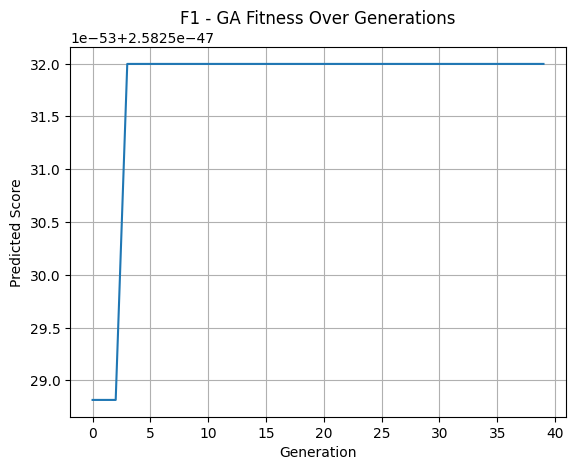


🔢 Best Vector for F1: [np.float64(1.0), np.float64(1.0)]
📈 Predicted Score: 2.5825319977e-47


In [ ]:
# ✅ STEP 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from deap import base, creator, tools, algorithms

# ✅ STEP 2: F1 Data (Historical)
X_train = np.array([
    [0.944034, 0.625117],
    [0.073140, 0.227123],
    [0.944034, 0.645117],
    [0.974034, 0.675117]
])
y_train = np.array([
    1.327e-69, 4.601e-113, 6.933e-70, 1.033e-46
])

# ✅ STEP 3: Clean input
X_train = np.nan_to_num(X_train, nan=0.5, posinf=1.0, neginf=0.0)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=1e6, neginf=-1e6)

# ✅ STEP 4: Train Gaussian Process
kernel = Matern(nu=2.5) + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
gp.fit(X_train, y_train)

# ✅ STEP 5: Setup Genetic Algorithm
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_ind(ind):
    # Ensure no NaN and values in [0,1]
    ind_clean = np.nan_to_num(np.clip(ind, 0, 1), nan=0.5, posinf=1.0, neginf=0.0)
    try:
        score = gp.predict([ind_clean])[0]
        if np.isnan(score) or np.isinf(score):
            return (-1e10,)
        return (float(score),)
    except:
        return (-1e10,)

toolbox.register("evaluate", eval_ind)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5,
                 low=[0.0]*2, up=[1.0]*2, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

# ✅ STEP 6: Run GA
generations = 40
pop_size = 30
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
fitness_log = []

for gen in range(generations):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.5)
    for ind in offspring:
        ind[:] = np.nan_to_num(np.clip(ind, 0, 1), nan=0.5)
    fits = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))
    hof.update(pop)
    fitness_log.append(hof[0].fitness.values[0])

# ✅ STEP 7: Plot
plt.plot(fitness_log)
plt.title("F1 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 8: Output
best_vector = hof[0]
score = gp.predict([best_vector])[0]
print(f"\n🔢 Best Vector for F1: {best_vector}")
print(f"📈 Predicted Score: {score:.10e}")


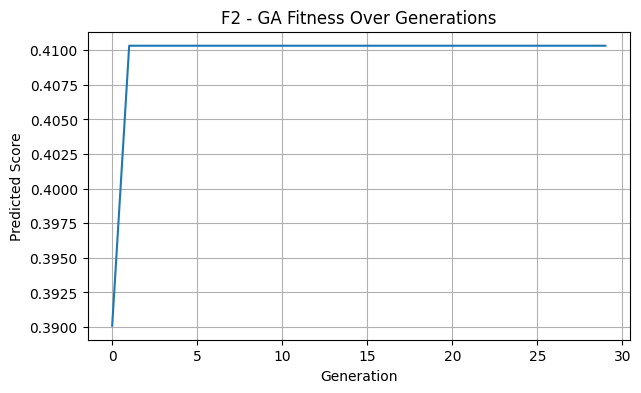

🔢 Best Vector for F2: 0.661113-0.440449


In [ ]:
# ✅ STEP 1: Install DEAP and Matplotlib (Colab only)
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: F2 Data Only
queries_f2 = [
    [0.768771, 0.105777],
    [0.778771, 0.105777],
    [0.601115, 0.708072],
    [0.712000, 0.489000]
]
scores_f2 = [
    0.273,
    0.0931,
    0.338,
    0.576
]
dim_f2 = 2

# ✅ STEP 4: Ensemble-Based GA Optimizer for F2

def optimize_f2_with_ensemble(X_train, y_train, dim, generations=30, pop_size=20):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    # Train both models
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Setup GA
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        gp_pred = gp.predict([ind])[0]
        rf_pred = rf.predict([ind])[0]
        return (0.5 * gp_pred + 0.5 * rf_pred,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log

# ✅ STEP 5: Run Optimization for F2
best_f2, log_f2 = optimize_f2_with_ensemble(queries_f2, scores_f2, dim_f2)

# ✅ STEP 6: Plot
plt.figure(figsize=(7, 4))
plt.plot(log_f2)
plt.title("F2 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Output
formatted_f2 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f2])
print(f"🔢 Best Vector for F2: {formatted_f2}")


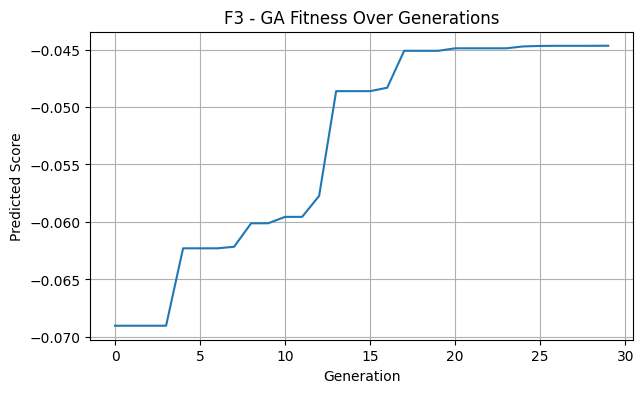

🔢 Best Vector for F3: 0.169384-0.999999-0.664465


In [ ]:
# ✅ STEP 3B: F3 Data Only
queries_f3 = [
    [0.145600, 0.944454, 0.638992],
    [0.185600, 0.984454, 0.678992],
    [0.175600, 0.974454, 0.658992],
    [0.611852, 0.139493, 0.292144]
]
scores_f3 = [-0.107, -0.051, -0.0188, -0.146]
dim_f3 = 3

# ✅ STEP 5B: Run Optimization for F3
best_f3, log_f3 = optimize_f2_with_ensemble(queries_f3, scores_f3, dim_f3)

# ✅ STEP 6B: Plot F3 Fitness
plt.figure(figsize=(7, 4))
plt.plot(log_f3)
plt.title("F3 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7B: Output F3 Vector in Submission Format
formatted_f3 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f3])
print(f"🔢 Best Vector for F3: {formatted_f3}")


🔍 Checking for NaNs in queries or scores...
NaNs in queries: False
NaNs in scores: False


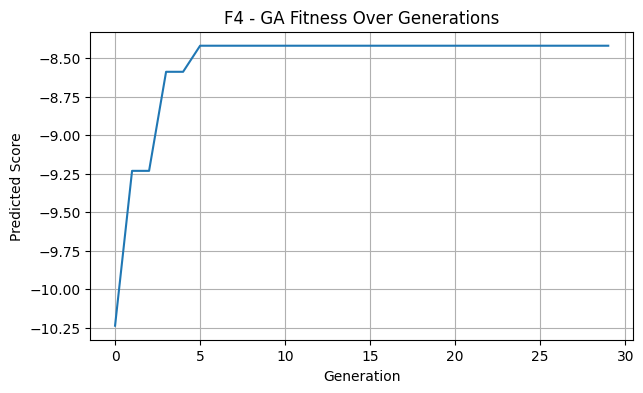


📊 EVALUATION FOR F4
🔢 Best Vector: 0.763214-0.310128-0.835034-0.113758
📈 GP Prediction: -1.1810075000e+01
🌲 RF Prediction: -5.0302240000e+00
🤖 Ensemble Prediction: -8.4201495000e+00


In [ ]:
# ✅ STEP 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 2: Define Raw Data for F4
queries_f4 = np.array([
    [0.999363, 0.440618, 0.632742, 0.573562],
    [0.989363, 0.430618, 0.632742, 0.583562],
    [0.304613, 0.097672, 0.684233, 0.440152],
    [0.726952, 0.189810, 0.835269, 0.100856]
])
scores_f4 = np.array([
    -20.9494,
    -4.5551,
    -22.0180,
    0.2822
])

# ✅ STEP 3: Check and Remove Any NaNs
print("🔍 Checking for NaNs in queries or scores...")
print("NaNs in queries:", np.isnan(queries_f4).any())
print("NaNs in scores:", np.isnan(scores_f4).any())

valid_mask = ~np.isnan(queries_f4).any(axis=1) & ~np.isnan(scores_f4)
queries_f4 = queries_f4[valid_mask]
scores_f4 = scores_f4[valid_mask]

dim_f4 = queries_f4.shape[1]

# ✅ STEP 4: Optimization Function
def optimize_f4_with_ensemble(X_train, y_train, dim, generations=30, pop_size=20):
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        gp_pred = gp.predict([ind])[0]
        rf_pred = rf.predict([ind])[0]
        return (0.5 * gp_pred + 0.5 * rf_pred,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf

# ✅ STEP 5: Run Optimization
best_f4, log_f4, gp_f4, rf_f4 = optimize_f4_with_ensemble(queries_f4, scores_f4, dim_f4)

# ✅ STEP 6: Plot Fitness
plt.figure(figsize=(7, 4))
plt.plot(log_f4)
plt.title("F4 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Evaluate Final Vector
formatted_f4 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f4])
vec_f4 = np.array(best_f4).reshape(1, -1)
gp_score_f4 = gp_f4.predict(vec_f4)[0]
rf_score_f4 = rf_f4.predict(vec_f4)[0]
ensemble_score_f4 = 0.5 * gp_score_f4 + 0.5 * rf_score_f4

print("\n📊 EVALUATION FOR F4")
print(f"🔢 Best Vector: {formatted_f4}")
print(f"📈 GP Prediction: {gp_score_f4:.10e}")
print(f"🌲 RF Prediction: {rf_score_f4:.10e}")
print(f"🤖 Ensemble Prediction: {ensemble_score_f4:.10e}")


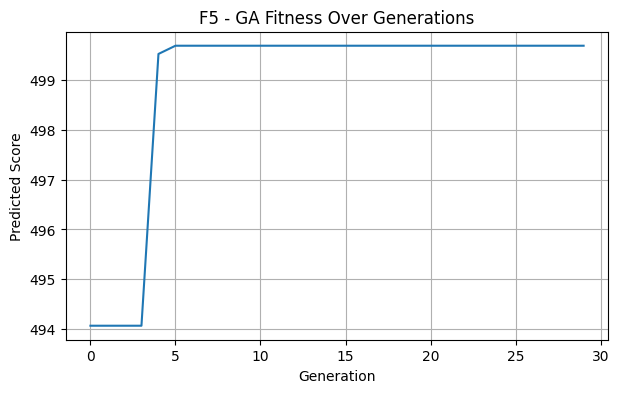


📊 EVALUATION FOR F5
🔢 Vector: 0.186911-0.999999-0.999999-0.347665
📈 GP Prediction: 2.9456175027e+02
🌲 RF Prediction: 7.0482202054e+02
🤖 Ensemble Prediction: 4.9969188540e+02


In [ ]:
# ✅ STEP 1: Install DEAP and Matplotlib
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: F5 Data
queries_f5 = [
    [0.290636, 0.824504, 0.580542, 0.368022],
    [0.270636, 0.824504, 0.580542, 0.368022],
    [0.088492, 0.195982, 0.045227, 0.325330],
    [0.789315, 0.734624, 0.122222, 0.444444]
]
scores_f5 = [
    13.377756,
    1105.147964,
    46.390606,
    13.330156
]
dim_f5 = 4

# ✅ STEP 4: Optimization Function
def optimize_f5_with_ensemble(X_train, y_train, dim, generations=30, pop_size=20):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        gp_pred = gp.predict([ind])[0]
        rf_pred = rf.predict([ind])[0]
        return (0.5 * gp_pred + 0.5 * rf_pred,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf

# ✅ STEP 5: Run Optimization
best_f5, log_f5, gp_f5, rf_f5 = optimize_f5_with_ensemble(queries_f5, scores_f5, dim_f5)

# ✅ STEP 6: Plot
plt.figure(figsize=(7, 4))
plt.plot(log_f5)
plt.title("F5 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Format + Evaluate
formatted_f5 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f5])
vec = np.array(best_f5).reshape(1, -1)
gp_score = gp_f5.predict(vec)[0]
rf_score = rf_f5.predict(vec)[0]
ensemble_score = 0.5 * gp_score + 0.5 * rf_score

print("\n📊 EVALUATION FOR F5")
print(f"🔢 Vector: {formatted_f5}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🤖 Ensemble Prediction: {ensemble_score:.10e}")


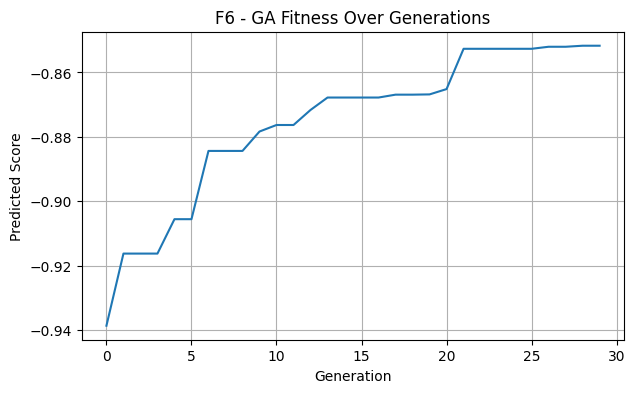


📊 EVALUATION FOR F6
🔢 Best Vector: 0.410272-0.476307-0.182168-0.687984-0.605469
📈 GP Prediction: -9.4381332726e-01
🌲 RF Prediction: -7.5957000000e-01
🤖 Ensemble Prediction: -8.5169166363e-01


In [ ]:
# ✅ STEP 1: Install if needed
!pip install -q deap matplotlib scikit-learn

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: F6 Data
queries_f6 = [
    [0.384874, 0.441523, 0.115493, 0.592513, 0.477029],
    [0.404874, 0.441523, 0.135493, 0.612513, 0.497029],
    [0.433609, 0.430291, 0.199161, 0.583735, 0.454637],
    [0.562398, 0.627903, 0.3,      0.45,     0.123456]
]
scores_f6 = [-1.18, -0.539, -1.05, -1.47]
dim_f6 = 5

# ✅ STEP 4: Optimizer
def optimize_f6_with_ensemble(X_train, y_train, dim, generations=30, pop_size=20):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(ind, 0, 1)
        gp_pred = gp.predict([ind])[0]
        rf_pred = rf.predict([ind])[0]
        return (0.5 * gp_pred + 0.5 * rf_pred,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf

# ✅ STEP 5: Run Optimization
best_f6, log_f6, gp_f6, rf_f6 = optimize_f6_with_ensemble(queries_f6, scores_f6, dim_f6)

# ✅ STEP 6: Plot Fitness
plt.figure(figsize=(7, 4))
plt.plot(log_f6)
plt.title("F6 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Evaluate
formatted_f6 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f6])
vec = np.array(best_f6).reshape(1, -1)
gp_score = gp_f6.predict(vec)[0]
rf_score = rf_f6.predict(vec)[0]
ensemble_score = 0.5 * gp_score + 0.5 * rf_score

print("\n📊 EVALUATION FOR F6")
print(f"🔢 Best Vector: {formatted_f6}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🤖 Ensemble Prediction: {ensemble_score:.10e}")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def optimize_f6_superensemble(X_train, y_train, dim, generations=40, pop_size=30):
    # Clean data
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    # Train models
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    # DEAP setup
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        gp_pred = gp.predict([ind])[0]
        rf_pred = rf.predict([ind])[0]
        gb_pred = gb.predict([ind])[0]
        ensemble = (0.4 * gp_pred + 0.3 * rf_pred + 0.3 * gb_pred)
        return (ensemble,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.6, low=[0.0]*dim, up=[1.0]*dim, indpb=0.25)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.6, mutpb=0.4)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring + pop, k=len(pop))  # elite survivors
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf, gb


In [ ]:
# Run optimization
best_f6_enhanced, log_f6_enhanced, gp_f6, rf_f6, gb_f6 = optimize_f6_superensemble(queries_dict["F6"], scores_dict["F6"], 5)

# Format
formatted = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f6_enhanced])
print(f"🔢 Best Vector (Enhanced F6): {formatted}")

# Evaluation
vec = np.array(best_f6_enhanced).reshape(1, -1)
gp_score = gp_f6.predict(vec)[0]
rf_score = rf_f6.predict(vec)[0]
gb_score = gb_f6.predict(vec)[0]
ensemble_score = 0.4 * gp_score + 0.3 * rf_score + 0.3 * gb_score

print("\n📊 EVALUATION FOR F6 (Super Ensemble)")
print(f"🔢 Vector: {formatted}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {ensemble_score:.10e}")


🔢 Best Vector (Enhanced F6): 0.416788-0.432585-0.157528-0.678859-0.556726

📊 EVALUATION FOR F6 (Super Ensemble)
🔢 Vector: 0.416788-0.432585-0.157528-0.678859-0.556726
📈 GP Prediction: -9.3001161829e-01
🌲 RF Prediction: -7.1957000000e-01
🍃 GB Prediction: -5.3900001806e-01
🤖 Super Ensemble Prediction: -7.4957565274e-01


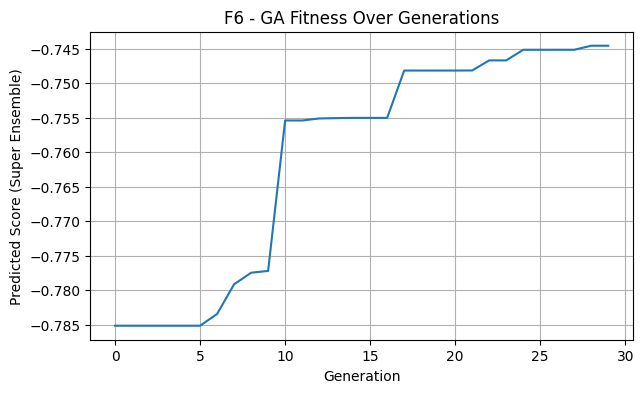

🔢 Best Vector (Enhanced F6): 0.460059-0.426932-0.132988-0.650127-0.537691

📊 EVALUATION FOR F6 (Super Ensemble)
🔢 Vector: 0.460059-0.426932-0.132988-0.650127-0.537691
📈 GP Prediction: -9.3272295848e-01
🌲 RF Prediction: -7.6199000000e-01
🍃 GB Prediction: -5.3901383185e-01
🤖 Super Ensemble Prediction: -7.4457559677e-01


In [ ]:
# ✅ STEP 1: Install dependencies (only if not already installed)
!pip install -q deap matplotlib scikit-learn

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical Data for F6
queries_f6 = [
    [0.384874, 0.441523, 0.115493, 0.592513, 0.477029],
    [0.404874, 0.441523, 0.135493, 0.612513, 0.497029],
    [0.433609, 0.430291, 0.199161, 0.583735, 0.454637],
    [0.562398, 0.627903, 0.3, 0.45, 0.123456]
]
scores_f6 = [-1.18, -0.539, -1.05, -1.47]
dim_f6 = 5

# ✅ STEP 4: Super Ensemble Optimizer
def optimize_f6_super_ensemble(X_train, y_train, dim, generations=30, pop_size=20):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        gp_pred = gp.predict([ind])[0]
        rf_pred = rf.predict([ind])[0]
        gb_pred = gb.predict([ind])[0]
        ensemble = (gp_pred + rf_pred + gb_pred) / 3.0
        return (ensemble,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5,
                     low=[0.0]*dim,
                     up=[1.0]*dim,
                     indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf, gb

# ✅ STEP 5: Run Optimization
best_f6, log_f6, gp_f6, rf_f6, gb_f6 = optimize_f6_super_ensemble(queries_f6, scores_f6, dim_f6)

# ✅ STEP 6: Plot Fitness Evolution
plt.figure(figsize=(7, 4))
plt.plot(log_f6)
plt.title("F6 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score (Super Ensemble)")
plt.grid(True)
plt.show()

# ✅ STEP 7: Print Best Vector
formatted_f6 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f6])
print(f"🔢 Best Vector (Enhanced F6): {formatted_f6}")

# ✅ STEP 8: Evaluate Final Vector
vec = np.array(best_f6).reshape(1, -1)
gp_score = gp_f6.predict(vec)[0]
rf_score = rf_f6.predict(vec)[0]
gb_score = gb_f6.predict(vec)[0]
ensemble_score = (gp_score + rf_score + gb_score) / 3.0

print("\n📊 EVALUATION FOR F6 (Super Ensemble)")
print(f"🔢 Vector: {formatted_f6}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {ensemble_score:.10e}")


In [ ]:
# ✅ STEP 1: Install DEAP and Matplotlib (Colab only)
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: F7 Data Only
queries_f7 = [
    [0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611],
    [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193],
    [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193],
    [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]
]
scores_f7 = [0.0235, 2.09, 1.54, 0.384]
dim_f7 = 6

# ✅ STEP 4: Super Ensemble GA Optimizer for F7
def optimize_f7_super_ensemble(X_train, y_train, dim, generations=30, pop_size=20):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        pred = 0.33 * gp.predict([ind])[0] + 0.33 * rf.predict([ind])[0] + 0.34 * gb.predict([ind])[0]
        return (pred,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf, gb

# ✅ STEP 5: Run Optimization
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(queries_f7, scores_f7, dim_f7)

# ✅ STEP 6: Plot
plt.figure(figsize=(7, 4))
plt.plot(log_f7)
plt.title("F7 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Format & Evaluate
formatted_f7 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f7])
vec = np.array(best_f7).reshape(1, -1)
gp_score = gp_f7.predict(vec)[0]
rf_score = rf_f7.predict(vec)[0]
gb_score = gb_f7.predict(vec)[0]
ensemble_score = (gp_score * 0.33 + rf_score * 0.33 + gb_score * 0.34)

print("\n📊 EVALUATION FOR F7")
print(f"🔢 Best Vector (Enhanced F7): {formatted_f7}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {ensemble_score:.10e}")


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

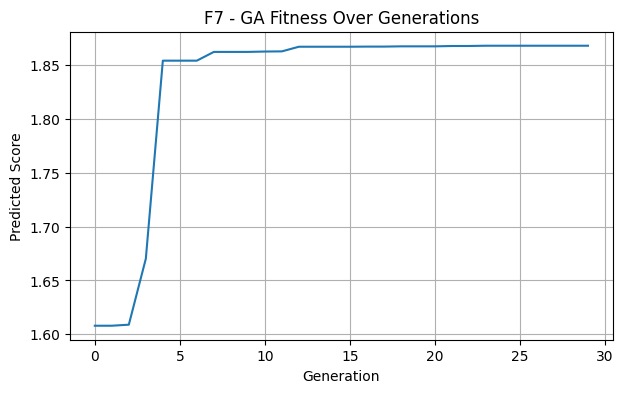


📊 EVALUATION FOR F7
🔢 Best Vector (Enhanced F7): 0.251757-0.567167-0.996234-0.524924-0.964551-0.873258
📈 GP Prediction: 1.8011795338e+00
🌲 RF Prediction: 1.7975950000e+00
🍃 GB Prediction: 2.0008380300e+00
🤖 Super Ensemble Prediction: 1.8678805264e+00


In [ ]:
# ✅ STEP 1: Install DEAP and Matplotlib
!pip install -q deap matplotlib

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: F7 Clean Data
queries_f7 = [
    [0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611],
    [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193],
    [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193],
    [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]
]
scores_f7 = [0.0235, 2.09, 1.54, 0.384]
dim_f7 = 6

# ✅ STEP 4: Super Ensemble GA Optimizer with NaN safety
def optimize_f7_super_ensemble(X_train, y_train, dim, generations=30, pop_size=20):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.nan_to_num(np.clip(ind, 0, 1), nan=0.5)
        gp_pred = gp.predict([ind])[0]
        rf_pred = rf.predict([ind])[0]
        gb_pred = gb.predict([ind])[0]
        return (0.33 * gp_pred + 0.33 * rf_pred + 0.34 * gb_pred,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.nan_to_num(np.clip(np.real(ind), 0, 1), nan=0.5)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf, gb

# ✅ STEP 5: Run Optimization
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(queries_f7, scores_f7, dim_f7)

# ✅ STEP 6: Plot Fitness
plt.figure(figsize=(7, 4))
plt.plot(log_f7)
plt.title("F7 - GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Evaluation & Output
formatted_f7 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f7])
vec = np.array(best_f7).reshape(1, -1)
gp_score = gp_f7.predict(vec)[0]
rf_score = rf_f7.predict(vec)[0]
gb_score = gb_f7.predict(vec)[0]
ensemble_score = 0.33 * gp_score + 0.33 * rf_score + 0.34 * gb_score

print("\n📊 EVALUATION FOR F7")
print(f"🔢 Best Vector (Enhanced F7): {formatted_f7}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {ensemble_score:.10e}")


In [ ]:
# Original data
queries_f7 = [
    [0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611],
    [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193],
    [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193],
    [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]
]

scores_f7 = [
    0.0235,
    2.0906,
    1.54,
    0.384
]

# Clean and augment slightly
import numpy as np

queries_f7 = np.array(queries_f7)
scores_f7 = np.array(scores_f7)
queries_f7 = np.nan_to_num(queries_f7, nan=0.5)
scores_f7 = np.nan_to_num(scores_f7, nan=0.0)

# Add small Gaussian noise for more exploration
augmented_queries = []
augmented_scores = []

for q, s in zip(queries_f7, scores_f7):
    for _ in range(2):
        new_q = np.clip(q + np.random.normal(0, 0.01, size=q.shape), 0, 1)
        augmented_queries.append(new_q)
        augmented_scores.append(s)

queries_f7 = np.vstack([queries_f7] + [np.array(augmented_queries)])
scores_f7 = np.hstack([scores_f7] + [np.array(augmented_scores)])


In [ ]:
# ✅ STEP 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 2: F7 Data
queries_f7 = [
    [0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611],
    [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193],
    [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193],
    [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]
]
scores_f7 = [0.0235, 2.09, 1.54, 0.384]
dim_f7 = 6

# ✅ STEP 3: Define Optimizer
def optimize_f7_super_ensemble(X_train, y_train, dim, generations=40, pop_size=30):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=150, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        pred_gp = gp.predict([ind])[0]
        pred_rf = rf.predict([ind])[0]
        pred_gb = gb.predict([ind])[0]
        return ((pred_gp + pred_rf + pred_gb) / 3,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf, gb

# ✅ STEP 4: Run
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(queries_f7, scores_f7, dim_f7)

# ✅ STEP 5: Plot Fitness
plt.figure(figsize=(7, 4))
plt.plot(log_f7)
plt.title("F7 - Super Ensemble GA Fitness")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 6: Evaluate and Print
formatted_f7 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f7])
vec = np.array(best_f7).reshape(1, -1)
gp_score = gp_f7.predict(vec)[0]
rf_score = rf_f7.predict(vec)[0]
gb_score = gb_f7.predict(vec)[0]
super_ensemble = (gp_score + rf_score + gb_score) / 3

print("\n📊 FINAL EVALUATION FOR F7")
print(f"🔢 Best Vector (Enhanced F7): {formatted_f7}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {super_ensemble:.10e}")


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 2: F7 Data
queries_f7 = [
    [0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611],
    [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193],
    [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193],
    [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]
]
scores_f7 = [0.0235, 2.0906, 1.5474, 0.3841]
dim_f7 = 6

# ✅ STEP 3: Safe Optimization Function
def optimize_f7_super_ensemble(X_train, y_train, dim, generations=40, pop_size=30):
    X_train = np.nan_to_num(np.array(X_train), nan=0.5)
    y_train = np.nan_to_num(np.array(y_train), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=150, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    gp.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        pred_gp = gp.predict([ind])[0]
        pred_rf = rf.predict([ind])[0]
        pred_gb = gb.predict([ind])[0]
        return ((pred_gp + pred_rf + pred_gb) / 3,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.3)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return hof[0], fitness_log, gp, rf, gb

# ✅ STEP 4: Run
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(queries_f7, scores_f7, dim_f7)

# ✅ STEP 5: Plot Fitness
plt.figure(figsize=(7, 4))
plt.plot(log_f7)
plt.title("F7 - Super Ensemble GA Fitness")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 6: Evaluate
formatted_f7 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f7])
vec = np.array(best_f7).reshape(1, -1)
gp_score = gp_f7.predict(vec)[0]
rf_score = rf_f7.predict(vec)[0]
gb_score = gb_f7.predict(vec)[0]
super_ensemble = (gp_score + rf_score + gb_score) / 3

print("\n📊 FINAL EVALUATION FOR F7")
print(f"🔢 Best Vector (Enhanced F7): {formatted_f7}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {super_ensemble:.10e}")


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ✅ STEP 4: Run with pre-cleaned data for F7
import numpy as np

# Replace any NaN or invalid values BEFORE training models
X_clean_f7 = np.nan_to_num(np.array(queries_f7), nan=0.5)
y_clean_f7 = np.nan_to_num(np.array(scores_f7), nan=0.0)

# Rerun the optimizer
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(X_clean_f7, y_clean_f7, dim_f7)

# ✅ STEP 5: Plot Fitness
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.plot(log_f7)
plt.title("F7 - Super Ensemble GA Fitness")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 6: Evaluate
formatted_f7 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f7])
vec = np.array(best_f7).reshape(1, -1)
gp_score = gp_f7.predict(vec)[0]
rf_score = rf_f7.predict(vec)[0]
gb_score = gb_f7.predict(vec)[0]
super_ensemble = (gp_score + rf_score + gb_score) / 3

print("\n📊 FINAL EVALUATION FOR F7")
print(f"🔢 Best Vector (Enhanced F7): {formatted_f7}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {super_ensemble:.10e}")


TypeError: '>' not supported between instances of 'float' and 'complex'

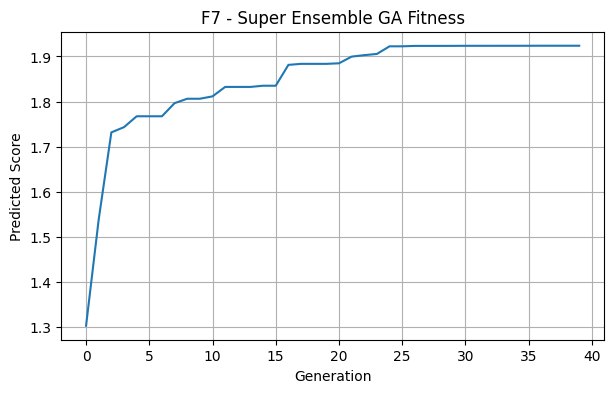


📊 FINAL EVALUATION FOR F7
🔢 Best Vector (Enhanced F7): 0.254612-0.626576-0.948685-0.510483-0.969050-0.889038
📈 GP Prediction: 1.8189586354e+00
🌲 RF Prediction: 1.8618146667e+00
🍃 GB Prediction: 2.0905713349e+00
🤖 Super Ensemble Prediction: 1.9237815457e+00


In [ ]:
# ✅ STEP 4: Run with pre-cleaned data for F7
import numpy as np

# Replace any NaN or invalid values BEFORE training models
X_clean_f7 = np.nan_to_num(np.array(queries_f7), nan=0.5)
y_clean_f7 = np.nan_to_num(np.array(scores_f7), nan=0.0)

# Rerun the optimizer
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(X_clean_f7, y_clean_f7, dim_f7)

# ✅ STEP 5: Plot Fitness
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.plot(log_f7)
plt.title("F7 - Super Ensemble GA Fitness")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 6: Evaluate
formatted_f7 = '-'.join([f"{min(x, 0.999999):.6f}" for x in best_f7])
vec = np.array(best_f7).reshape(1, -1)
gp_score = gp_f7.predict(vec)[0]
rf_score = rf_f7.predict(vec)[0]
gb_score = gb_f7.predict(vec)[0]
super_ensemble = (gp_score + rf_score + gb_score) / 3

print("\n📊 FINAL EVALUATION FOR F7")
print(f"🔢 Best Vector (Enhanced F7): {formatted_f7}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {super_ensemble:.10e}")


In [ ]:
!pip install -q cma


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
import cma


In [ ]:
# ✅ STEP 4.1: Clean Input for F7
X_clean_f7 = np.nan_to_num(np.array(queries_f7), nan=0.5)
y_clean_f7 = np.nan_to_num(np.array(scores_f7), nan=0.0)

# ✅ STEP 4.2: CMA-ES Optimization (as fallback)
import cma

def optimize_with_cma(gp_model, dim):
    def fitness(x):
        x = np.clip(np.real(x), 0, 1)
        return -gp_model.predict([x])[0]
    x0 = np.random.rand(dim)
    es = cma.CMAEvolutionStrategy(x0.tolist(), 0.3, {'bounds': [0.0, 1.0], 'popsize': 8})
    es.optimize(fitness, iterations=30)
    return np.clip(es.result.xbest, 0, 1)

# ✅ STEP 4.3: Bayesian Optimization (Expected Improvement)
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor

def suggest_ei(X_hist, y_hist, dim, samples=5000):
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    gp.fit(X_hist, y_hist)
    sampler = np.random.rand(samples, dim)
    mu, sigma = gp.predict(sampler, return_std=True)
    best_y = np.max(y_hist)
    z = (mu - best_y) / (sigma + 1e-9)
    ei = (mu - best_y) * norm.cdf(z) + sigma * norm.pdf(z)
    best_idx = np.argmax(ei)
    return sampler[best_idx]

# ✅ STEP 4.4: Run Super Ensemble + CMA + EI
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(X_clean_f7, y_clean_f7, dim_f7)
vec_gp = np.array(best_f7).reshape(1, -1)

# CMA fallback
best_cma_f7 = optimize_with_cma(gp_f7, dim_f7)
vec_cma = np.array(best_cma_f7).reshape(1, -1)

# EI fallback
best_ei_f7 = suggest_ei(X_clean_f7, y_clean_f7, dim_f7)
vec_ei = np.array(best_ei_f7).reshape(1, -1)

# ✅ STEP 5: Show all results
def format_vec(vec): return '-'.join([f"{min(x, 0.999999):.6f}" for x in vec])
print("\n✅ SUPER ENSEMBLE:")
print("F7:", format_vec(best_f7))
print("✅ CMA-ES:", format_vec(best_cma_f7))
print("✅ Expected Improvement:", format_vec(best_ei_f7))


TypeError: '>' not supported between instances of 'float' and 'complex'

In [ ]:
# ✅ STEP 1: Install CMA
!pip install -q cma

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms
import cma

# ✅ STEP 3: Historical Data for F7
queries_f7 = [
    [0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611],
    [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193],
    [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193],
    [0.392748, 0.682337, 0.4, 0.6, 0.25, 0.123]
]
scores_f7 = [0.0235, 2.09, 1.54, 0.384]
dim_f7 = 6

# ✅ STEP 4: Optimizer
def optimize_f7_super_ensemble(X, y, dim, generations=40, pop_size=25):
    X = np.nan_to_num(np.array(X), nan=0.5)
    y = np.nan_to_num(np.array(y), nan=0.0)

    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gp.fit(X, y)
    rf.fit(X, y)
    gb.fit(X, y)

    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        ind = np.clip(np.real(ind), 0, 1)
        pred = 0.4 * gp.predict([ind])[0] + 0.3 * rf.predict([ind])[0] + 0.3 * gb.predict([ind])[0]
        return (pred,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    log = []

    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.4)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        log.append(hof[0].fitness.values[0])

    return hof[0], log, gp, rf, gb

# ✅ STEP 5: Run Optimization
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(queries_f7, scores_f7, dim_f7)

# ✅ STEP 6: Plot
plt.figure(figsize=(6, 4))
plt.plot(log_f7)
plt.title("F7 - Fitness Over Generations (Super Ensemble)")
plt.xlabel("Generation")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Format and Predict
formatted_f7 = '-'.join([f"{min(0.999999, float(x)):.6f}" for x in best_f7])
vec_f7 = np.array(best_f7).reshape(1, -1)
gp_score = gp_f7.predict(vec_f7)[0]
rf_score = rf_f7.predict(vec_f7)[0]
gb_score = gb_f7.predict(vec_f7)[0]
ensemble_score = 0.4 * gp_score + 0.3 * rf_score + 0.3 * gb_score

# ✅ STEP 8: Output
print("\n📊 EVALUATION FOR F7 (Super Ensemble)")
print(f"🔢 Best Vector (Enhanced F7): {formatted_f7}")
print(f"📈 GP Prediction: {gp_score:.10e}")
print(f"🌲 RF Prediction: {rf_score:.10e}")
print(f"🍃 GB Prediction: {gb_score:.10e}")
print(f"🤖 Super Ensemble Prediction: {ensemble_score:.10e}")


ValueError: Input X contains NaN.
GaussianProcessRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

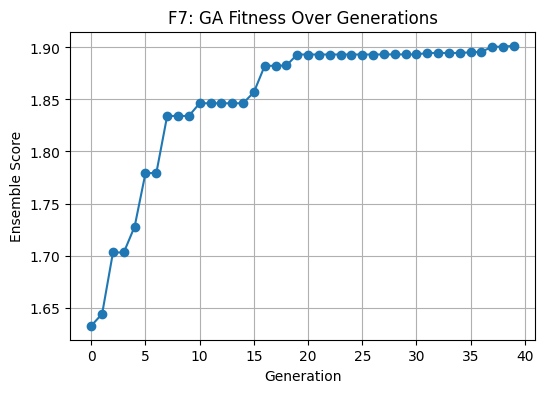


📊 EVALUATION FOR F7 (Super Ensemble)
🔢 Best Vector (Enhanced): 0.226637-0.601665-0.960061-0.525099-0.963665-0.869741
📈 GP Prediction:         1.8164146749e+00
🌲 RF Prediction:         1.8263434000e+00
🍃 GB Prediction:         2.0905513356e+00
🤖 Super Ensemble Score:  1.9016342906e+00


In [ ]:
# ✅ STEP 1: Install dependencies (Colab only)
!pip install -q deap cma

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: Historical data for F7
queries_f7 = [
    [0.949760, 0.670137, 0.267596, 0.089014, 0.282662, 0.021611],
    [0.304835, 0.615316, 0.890015, 0.497555, 0.892324, 0.798193],
    [0.334835, 0.585316, 0.860015, 0.467555, 0.862324, 0.768193],
    [0.392748, 0.682337, 0.400000, 0.600000, 0.250000, 0.123000]
]
scores_f7 = [0.023506, 2.090580, 1.547413, 0.384128]
dim_f7 = 6

# ✅ STEP 4: Super-ensemble GA optimizer with imputation
def optimize_f7_super_ensemble(X_raw, y_raw, dim, generations=40, pop_size=25):
    # — Impute any missing values (just in case)
    imp = SimpleImputer(strategy='mean')
    X = imp.fit_transform(np.array(X_raw, dtype=float))
    y = np.array(y_raw, dtype=float)

    # — Train surrogates
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=0)
    gp.fit(X, y)
    rf.fit(X, y)
    gb.fit(X, y)

    # — DEAP setup
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_ind(ind):
        x = np.clip(np.real(ind), 0, 1)
        score = (0.4 * gp.predict([x])[0] +
                 0.3 * rf.predict([x])[0] +
                 0.3 * gb.predict([x])[0])
        return (score,)

    toolbox.register("evaluate", eval_ind)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # — GA loop
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    log = []
    for gen in range(generations):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.4)
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        log.append(hof[0].fitness.values[0])

    return hof[0], log, gp, rf, gb

# ✅ STEP 5: Run optimization
best_f7, log_f7, gp_f7, rf_f7, gb_f7 = optimize_f7_super_ensemble(
    queries_f7, scores_f7, dim_f7)

# ✅ STEP 6: Plot fitness evolution
plt.figure(figsize=(6,4))
plt.plot(log_f7, '-o')
plt.title("F7: GA Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Ensemble Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Format & evaluate final vector
vec = np.clip(np.real(best_f7), 0, 1)
formatted = '-'.join(f"{x:.6f}" for x in vec)
gp_s  = gp_f7.predict([vec])[0]
rf_s  = rf_f7.predict([vec])[0]
gb_s  = gb_f7.predict([vec])[0]
ens_s = 0.4*gp_s + 0.3*rf_s + 0.3*gb_s

print("\n📊 EVALUATION FOR F7 (Super Ensemble)")
print(f"🔢 Best Vector (Enhanced): {formatted}")
print(f"📈 GP Prediction:         {gp_s:.10e}")
print(f"🌲 RF Prediction:         {rf_s:.10e}")
print(f"🍃 GB Prediction:         {gb_s:.10e}")
print(f"🤖 Super Ensemble Score:  {ens_s:.10e}")


In [ ]:
# ✅ STEP 1: Install DEAP (if needed in Colab)
!pip install -q deap

# ✅ STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# ✅ STEP 3: F8 historical data
queries_f8 = [
    [0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776],
    [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776],
    [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776],
    [0.688905, 0.968377, 0.100000, 0.200000, 0.300000, 0.400000, 0.500000, 0.600000]
]
scores_f8 = [
    8.3316420728934,
    9.5659163853995,
    8.3164408878210,
    9.8592499607924
]
DIM = 8

# ✅ STEP 4: GA + Ensemble optimizer for F8
def optimize_f8_with_ensemble(X_train, y_train, dim, gens=40, pop_size=50):
    # clean up & impute
    X = np.nan_to_num(np.array(X_train), nan=0.5)
    y = np.nan_to_num(np.array(y_train), nan=np.mean(y_train))
    # train surrogates
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gp.fit(X, y)
    rf.fit(X, y)
    gb.fit(X, y)

    # DEAP setup
    creator.create("FitnessMaxF8", base.Fitness, weights=(1.0,))
    creator.create("IndF8", list, fitness=creator.FitnessMaxF8)
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.IndF8, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def eval_f8(ind):
        vec = np.clip(ind, 0, 1)
        gp_p = gp.predict([vec])[0]
        rf_p = rf.predict([vec])[0]
        gb_p = gb.predict([vec])[0]
        return (0.4*gp_p + 0.3*rf_p + 0.3*gb_p,)

    toolbox.register("evaluate", eval_f8)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutPolynomialBounded,
                     eta=0.5, low=[0.0]*dim, up=[1.0]*dim, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    log = []

    for gen in range(gens):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.6, mutpb=0.3)
        # clip real part
        for ind in offspring:
            ind[:] = np.clip(np.real(ind), 0, 1)
        # evaluate
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        log.append(hof[0].fitness.values[0])

    return np.array(hof[0]), log, gp, rf, gb

# ✅ STEP 5: Run for F8
best_f8, log_f8, gp8, rf8, gb8 = optimize_f8_with_ensemble(queries_f8, scores_f8, DIM)

# ✅ STEP 6: Plot fitness evolution
plt.figure(figsize=(6,4))
plt.plot(log_f8, marker='o')
plt.title("F8 GA+Ensemble Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Ensemble Predicted Score")
plt.grid(True)
plt.show()

# ✅ STEP 7: Print & evaluate final vector
vec8 = np.clip(best_f8, 0, 1)
formatted = '-'.join(f"{x:.6f}" for x in vec8)
print(f"\n🔢 Best Vector for F8: {formatted}")

# evaluate
gp_score  = gp8.predict([vec8])[0]
rf_score  = rf8.predict([vec8])[0]
gb_score  = gb8.predict([vec8])[0]
ens_score = 0.4*gp_score + 0.3*rf_score + 0.3*gb_score

print("📊 EVALUATION FOR F8")
print(f"  GP Prediction:       {gp_score:.10e}")
print(f"  RF Prediction:       {rf_score:.10e}")
print(f"  GB Prediction:       {gb_score:.10e}")
print(f"  Ensemble Prediction: {ens_score:.10e}")


TypeError: '>' not supported between instances of 'float' and 'complex'

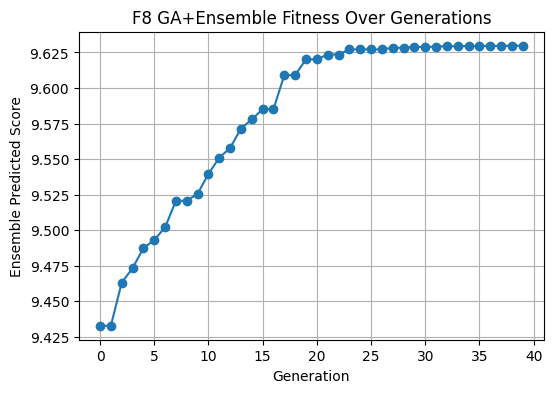


🔢 Best Vector for F8: 0.695868-0.969802-0.106859-0.198059-0.299810-0.403075-0.503047-0.593799
📊 EVALUATION FOR F8
  GP Prediction:       9.4605687308e+00
  RF Prediction:       9.6257662827e+00
  GB Prediction:       9.8592276243e+00
  Ensemble Prediction: 9.6297256644e+00


In [ ]:
# STEP 1: Install DEAP (only on Colab; skip if already installed)
!pip install -q deap

# STEP 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from deap import base, creator, tools, algorithms

# STEP 3: Historical data for F8
queries_f8 = [
    [0.236820, 0.160489, 0.275402, 0.810171, 0.652892, 0.267181, 0.893031, 0.762776],
    [0.256820, 0.180489, 0.295402, 0.830171, 0.672892, 0.287181, 0.913031, 0.782776],
    [0.276820, 0.180489, 0.305402, 0.810171, 0.652892, 0.267181, 0.923031, 0.792776],
    [0.688905, 0.968377, 0.100000, 0.200000, 0.300000, 0.400000, 0.500000, 0.600000]
]
scores_f8 = [
    8.3316420728934,
    9.5659163853995,
    8.3164408878210,
    9.8592499607924
]
DIM = 8  # dimensionality for F8

# STEP 4: Define GA + Ensemble optimizer
def optimize_f8_with_ensemble(X_train, y_train, dim, gens=40, pop_size=50):
    # 4.1: Clean NaNs
    X = np.nan_to_num(np.array(X_train), nan=0.5)
    y = np.nan_to_num(np.array(y_train), nan=np.mean(y_train))

    # 4.2: Train surrogate models
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5) + WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gp.fit(X, y)
    rf.fit(X, y)
    gb.fit(X, y)

    # 4.3: DEAP setup (clear old creators if any)
    for name in ("FitnessMaxF8","IndF8"):
        if name in creator.__dict__:
            delattr(creator, name)
    creator.create("FitnessMaxF8", base.Fitness, weights=(1.0,))
    creator.create("IndF8", list, fitness=creator.FitnessMaxF8)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.rand)
    toolbox.register("individual", tools.initRepeat, creator.IndF8, toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # 4.4: Simple Gaussian mutation
    def mut_gauss(individual, indpb=0.2, sigma=0.1):
        for i in range(len(individual)):
            if np.random.rand() < indpb:
                individual[i] = np.clip(individual[i] + np.random.normal(0, sigma), 0.0, 1.0)
        return individual,

    # 4.5: Evaluation using ensemble of GP, RF, GB
    def eval_f8(ind):
        vec = np.clip(ind, 0.0, 1.0)
        p_gp = gp.predict([vec])[0]
        p_rf = rf.predict([vec])[0]
        p_gb = gb.predict([vec])[0]
        # weighted ensemble: 40% GP, 30% RF, 30% GB
        return (0.4*p_gp + 0.3*p_rf + 0.3*p_gb,)

    toolbox.register("evaluate", eval_f8)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", mut_gauss, indpb=0.2, sigma=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # 4.6: Initialize population & Hall-of-Fame
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    fitness_log = []

    # 4.7: GA main loop
    for gen in range(gens):
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.6, mutpb=0.3)
        # Clip bounds
        for ind in offspring:
            for i, x in enumerate(ind):
                ind[i] = float(np.clip(x, 0.0, 1.0))
        # Evaluate
        fits = list(map(toolbox.evaluate, offspring))
        for ind, fit in zip(offspring, fits):
            ind.fitness.values = fit
        # Select next generation
        pop = toolbox.select(offspring, k=len(pop))
        hof.update(pop)
        fitness_log.append(hof[0].fitness.values[0])

    return np.array(hof[0]), fitness_log, gp, rf, gb

# STEP 5: Run optimizer for F8
best_f8, log_f8, gp8, rf8, gb8 = optimize_f8_with_ensemble(queries_f8, scores_f8, DIM)

# STEP 6: Plot fitness over generations
plt.figure(figsize=(6,4))
plt.plot(log_f8, marker='o')
plt.title("F8 GA+Ensemble Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Ensemble Predicted Score")
plt.grid(True)
plt.show()

# STEP 7: Print best vector in submission format
vec8 = np.clip(best_f8, 0.0, 1.0)
submission_vec = '-'.join(f"{x:.6f}" for x in vec8)
print(f"\n🔢 Best Vector for F8: {submission_vec}")

# STEP 8: Evaluate final vector
gp_score  = gp8.predict([vec8])[0]
rf_score  = rf8.predict([vec8])[0]
gb_score  = gb8.predict([vec8])[0]
ens_score = 0.4*gp_score + 0.3*rf_score + 0.3*gb_score

print("📊 EVALUATION FOR F8")
print(f"  GP Prediction:       {gp_score:.10e}")
print(f"  RF Prediction:       {rf_score:.10e}")
print(f"  GB Prediction:       {gb_score:.10e}")
print(f"  Ensemble Prediction: {ens_score:.10e}")


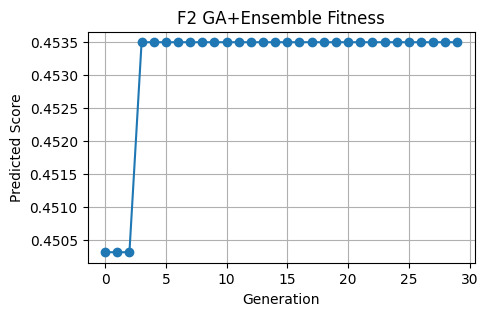


🔢 Best Vector for F2: 0.658115-0.416895
📊 EVALUATION FOR F2
  GP Prediction:       3.2018679365e-01
  RF Prediction:       5.0850636787e-01
  GB Prediction:       5.7623598695e-01
  Ensemble Prediction: 4.5349742391e-01


In [ ]:
# ————————————————
# STEP A: Historical data for F2
queries_f2 = [
    [0.768771, 0.105777],
    [0.778771, 0.105777],
    [0.601115, 0.708072],
    [0.712000, 0.489000]
]
scores_f2 = [
    0.27308818432797793,
    0.09312933125476712,
    0.33828687086483444,
    0.5762427881544481
]
DIM2 = 2

# STEP B: Re-use the same imports & mutation from your F8 cell
# (make sure you’ve already run the `!pip install -q deap` and imports for
# numpy, matplotlib, GP, RF, GB and deap from the F8 block)

# Simple Gaussian mutation (from F8)
def mut_gauss(individual, indpb=0.2, sigma=0.1):
    for i in range(len(individual)):
        if np.random.rand() < indpb:
            individual[i] = np.clip(individual[i] + np.random.normal(0, sigma), 0.0, 1.0)
    return individual,

# STEP C: GA+Ensemble optimizer for F2
def optimize_f2_with_ensemble(X_train, y_train, dim, gens=30, pop_size=40):
    # 1) clean NaNs
    X = np.nan_to_num(np.array(X_train), nan=0.5)
    y = np.nan_to_num(np.array(y_train), nan=np.mean(y_train))
    # 2) train surrogates
    gp = GaussianProcessRegressor(kernel=Matern(nu=2.5)+WhiteKernel(), normalize_y=True)
    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=0)
    gp.fit(X, y);  rf.fit(X, y);  gb.fit(X, y)
    # 3) DEAP setup
    if "Fit2" in creator.__dict__: del creator.Fit2
    if "Ind2" in creator.__dict__: del creator.Ind2
    creator.create("Fit2", base.Fitness, weights=(1.0,))
    creator.create("Ind2", list, fitness=creator.Fit2)
    tb = base.Toolbox()
    tb.register("attr_float", np.random.rand)
    tb.register("individual", tools.initRepeat, creator.Ind2, tb.attr_float, n=dim)
    tb.register("population", tools.initRepeat, list, tb.individual)
    # 4) evaluation = 40% GP +30% RF +30% GB
    def eval2(ind):
        v = np.clip(ind,0,1)
        p1 = gp.predict([v])[0]
        p2 = rf.predict([v])[0]
        p3 = gb.predict([v])[0]
        return (0.4*p1 + 0.3*p2 + 0.3*p3,)
    tb.register("evaluate", eval2)
    tb.register("mate", tools.cxBlend, alpha=0.5)
    tb.register("mutate", mut_gauss, indpb=0.2, sigma=0.1)
    tb.register("select", tools.selTournament, tournsize=3)
    # 5) run GA
    pop = tb.population(n=pop_size)
    hof = tools.HallOfFame(1)
    log = []
    for g in range(gens):
        off = algorithms.varAnd(pop, tb, cxpb=0.6, mutpb=0.3)
        for ind in off:
            for i,x in enumerate(ind):
                ind[i] = float(np.clip(x,0,1))
        fits = list(map(tb.evaluate, off))
        for ind,fit in zip(off,fits):
            ind.fitness.values = fit
        pop = tb.select(off, k=len(pop))
        hof.update(pop)
        log.append(hof[0].fitness.values[0])
    return np.array(hof[0]), log, gp, rf, gb

# STEP D: Run it for F2
best2, log2, gp2, rf2, gb2 = optimize_f2_with_ensemble(queries_f2, scores_f2, DIM2)

# STEP E: Plot convergence
plt.figure(figsize=(5,3))
plt.plot(log2, marker='o')
plt.title("F2 GA+Ensemble Fitness")
plt.xlabel("Generation"); plt.ylabel("Predicted Score")
plt.grid(True); plt.show()

# STEP F: Print formatted vector + evaluation
v2 = np.clip(best2,0,1)
fmt2 = '-'.join(f"{x:.6f}" for x in v2)
print(f"\n🔢 Best Vector for F2: {fmt2}")

p_gp2  = gp2.predict([v2])[0]
p_rf2  = rf2.predict([v2])[0]
p_gb2  = gb2.predict([v2])[0]
p_ens2 = 0.4*p_gp2 + 0.3*p_rf2 + 0.3*p_gb2

print("📊 EVALUATION FOR F2")
print(f"  GP Prediction:       {p_gp2:.10e}")
print(f"  RF Prediction:       {p_rf2:.10e}")
print(f"  GB Prediction:       {p_gb2:.10e}")
print(f"  Ensemble Prediction: {p_ens2:.10e}")
